In [40]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk

In [41]:
train = pd.read_csv("/content/ twitter sentiment analysis/train_tweets.csv")
test = pd.read_csv("/content/ twitter sentiment analysis/test_tweets.csv")

In [42]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [43]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [44]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [45]:
new = train.append(test,ignore_index = True)
new.shape

(49159, 3)

In [46]:
new.iloc[31960:31972, : ] 

,id,label,tweet
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0.0,thank you @user for you follow
31962,31963,NaN,#studiolife #aislife #requires #passion #dedic...
31963,31964,NaN,@user #white #supremacists want everyone to s...
31964,31965,NaN,safe ways to heal your #acne!! #altwaystohe...
31965,31966,NaN,is the hp and the cursed child book up for res...
31966,31967,NaN,"3rd #bihday to my amazing, hilarious #nephew..."
31967,31968,NaN,choose to be :) #momtips
31968,31969,NaN,something inside me dies ð¦ð¿â¨ eyes nes...
31969,31970,NaN,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...


**A user defined function to remove unwanted text like '@' and patterns**

In [47]:
def remove_pattern(pattern,input_txt):
    msg = re.findall(pattern,input_txt)
    for i in msg:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [48]:
pattern = "@[\w]*"
new['tweet_new'] = np.vectorize(remove_pattern)(pattern, new['tweet'])

In [49]:
new.head()

,id,label,tweet,tweet_new
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


**Repace all character except alphabets and # with space.But first convert every tweets into string from object**

In [50]:
pattern1 = "[^a-zA-Z#]"
new['tweet_new'] = new['tweet_new'].str.replace(pattern1," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [51]:
new.head(20)

,id,label,tweet,tweet_new
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


**remove the very small word which are not usable**

In [52]:
new['tweet_new'] = new['tweet_new'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))

In [53]:
new.head(20)

,id,label,tweet,tweet_new
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [54]:
tokens = new['tweet_new'].apply(lambda x : x.split())
tokens.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweet_new, dtype: object

In [55]:
from wordcloud import WordCloud

**Recist and Non-Recist ,visuallization of both**

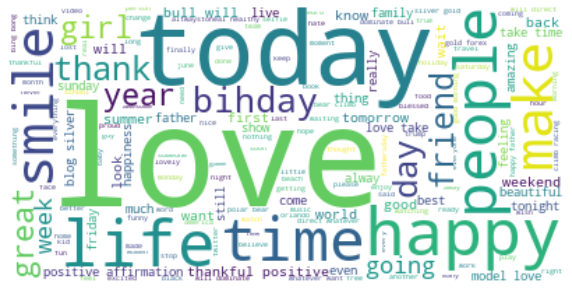

In [56]:
all_words = ' '.join([txt for txt in new['tweet_new']])
wc = WordCloud(width=400, height=200, background_color='white',max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

**Recist Tweet visualliazation**

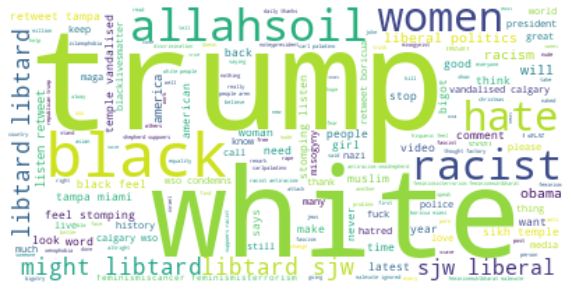

In [57]:
all_words = ' '.join([txt for txt in new['tweet_new'][new['label']==1]])
wc = WordCloud(width=400, height=200, background_color='white',max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

**Non-Recist Tweets visualliazation**

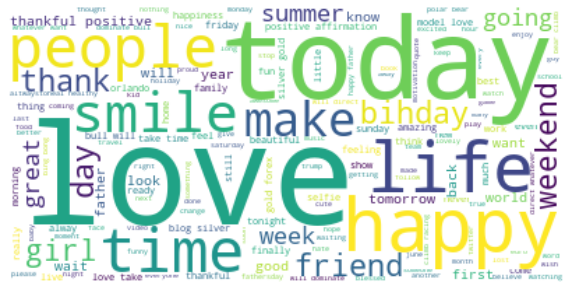

In [58]:
all_words = ' '.join([txt for txt in new['tweet_new'][new['label']==0]])
wc = WordCloud(width=400, height=200, background_color='white',max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
new.drop(['tweet','id'],axis=1,inplace=True)

In [60]:
new.head()

,label,tweet_new
0,0.0,when father dysfunctional selfish drags kids i...
1,0.0,thanks #lyft credit cause they offer wheelchai...
2,0.0,bihday your majesty
3,0.0,#model love take with time
4,0.0,factsguide society #motivation


In [61]:
train_set = new.iloc[ :31962, : ]
test_set = new.iloc[31962: , : ]

In [62]:
train_set.tail()

,label,tweet_new
31957,0.0,that youuu
31958,0.0,nina turner airwaves trying wrap herself mantl...
31959,0.0,listening songs monday morning work
31960,1.0,#sikh #temple vandalised #calgary #wso condemns
31961,0.0,thank follow


In [63]:
test_set.head()

,label,tweet_new
31962,NaN,#studiolife #aislife #requires #passion #dedic...
31963,NaN,#white #supremacists want everyone #birds #mov...
31964,NaN,safe ways heal your #acne #altwaystoheal #heal...
31965,NaN,cursed child book reservations already where w...
31966,NaN,#bihday amazing hilarious #nephew ahmir uncle ...


In [64]:
test_set.drop(['label'],axis=1,inplace=True)
test_set.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tweet_new
31962,#studiolife #aislife #requires #passion #dedic...
31963,#white #supremacists want everyone #birds #mov...
31964,safe ways heal your #acne #altwaystoheal #heal...
31965,cursed child book reservations already where w...
31966,#bihday amazing hilarious #nephew ahmir uncle ...


In [77]:
X = train_set.tweet_new
y = train_set.label

In [78]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=5)

In [79]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(25569,)
(6393,)
(25569,)
(6393,)


# Bag Of Words ( Count Vectorizer )

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_val_cv = cv.transform(X_val)

In [81]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# 1.Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [83]:
lr.fit(X_train_cv,y_train)

LogisticRegression()

In [85]:
#prediction on validation set
prediction = lr.predict_proba(X_val_cv)

In [86]:
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)

In [87]:
from sklearn.metrics import f1_score
f1_score(y_val,prediction_int)

0.6758793969849246

In [88]:
lr.score(X_val_cv,y_val)

0.9569842014703582

*Let's make predictions for test dataset and create a submission file*

In [89]:
test_cv = cv.transform(test_set['tweet_new'])

In [90]:
test_pred = lr.predict_proba(test_cv)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)

In [91]:
test_set['label'] = test_pred_int
submission = test_set[['tweet_new','label']]
submission.to_csv("prediction_result.csv",index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 2. Naive Bayes Multinomial

In [92]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [93]:
mnb.fit(X_train_cv,y_train)

MultinomialNB()

In [94]:
mnb.score(X_val_cv,y_val)

0.9540122008446739

# 3.Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_cv,y_train)

RandomForestClassifier()

In [100]:
rf.score(X_val_cv,y_val)

0.9616768340372283

In [101]:
test_pred = rf.predict_proba(test_cv)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)

test_set['label'] = test_pred_int
submission = test_set[['tweet_new','label']]
submission.to_csv("prediction_using_Random_Forest.csv",index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## TF-IDF Vectorizer

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [103]:
X_train_tf = tf.fit_transform(X_train)
X_val_tf = tf.transform(X_val)
test_tf = tf.transform(test_set['tweet_new']) #applying TF-IDF vectorizer on test dataset

# 1.Logistic Regression

In [104]:
lr.fit(X_train_tf,y_train)

LogisticRegression()

In [105]:
lr.score(X_val_tf,y_val)

0.9454090411387455

# 2.Naive Bayes Multinomial

In [109]:
mnb.fit(X_train_tf,y_train)

MultinomialNB()

In [110]:
mnb.score(X_val_tf,y_val)

0.9383700922884405

# **3.Random Forest Classifier**

In [111]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tf,y_train)

RandomForestClassifier()

In [112]:
rf.score(X_val_tf,y_val)

0.9602690442671672

In [113]:
#prediction on validation set
prediction1 = rf.predict_proba(X_val_tf)
prediction_int_tf = prediction1[:,1]>=0.3
prediction_int_tf = prediction_int_tf.astype(np.int)
from sklearn.metrics import f1_score
f1_score(y_val,prediction_int_tf)

0.6674233825198638